In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# 훈련용 데이터 불러오기
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")
train.head(5)
# train
# Embarked는 승선한 곳을 말하며, C(Cherbourg), Q(Queenstown), S(Southampton)를 뜻함.
# 인덱스 정보: https://thebook.io/006723/ch11/01/

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
def show_pie_chart(df, col_name):
    colname_survived = survived_crosstab(train, col_name)
    pie_chart(colname_survived)
    return colname_survived

def survived_crosstab(df, col_name):
    '''col_name과 Survived간의 교차도표 생성'''
    feature_survived = pd.crosstab(df[col_name], df['Survived'])
    feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
    return feature_survived

def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = frows
    prow = 1
    plot_height = prow * 2.5
    plt.figure(figsize=(pcol*3, plot_height)) # 그래프(차트)의 가로 세로 크기

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' survived".format(index_name))

    plt.show()

성별과 생존률의 관계

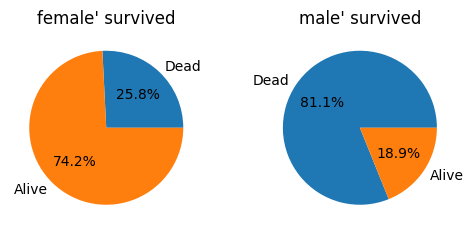

Survived,Dead,Alive
Sex,,
female,81,233
male,468,109


In [6]:
c = show_pie_chart(train, 'Sex')
c


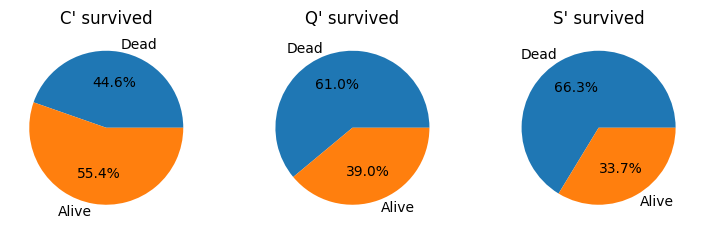

Survived,Dead,Alive
Embarked,,
C,75,93
Q,47,30
S,427,217


In [7]:
c = show_pie_chart(train, 'Embarked')
c

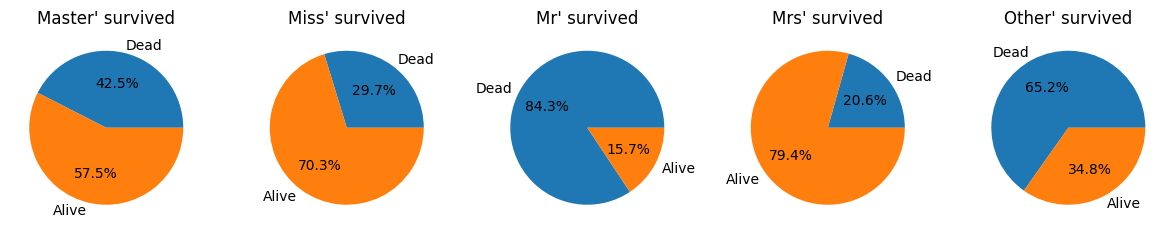

Survived,Dead,Alive
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Other,15,8


In [8]:
# 호칭 추출 
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.')
train['Title'].value_counts()

train['Title'] = train['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Ms', 'Miss')   
train['Title'].value_counts()

c = show_pie_chart(train, 'Title')
c

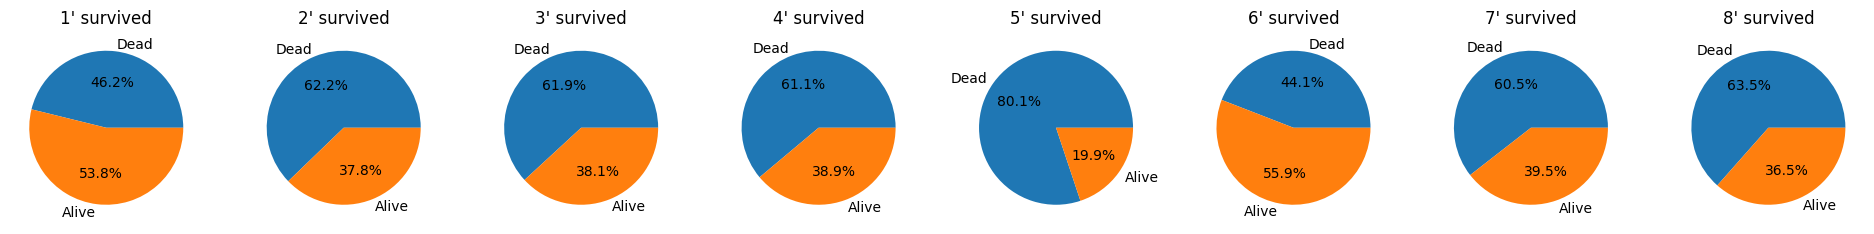

Survived,Dead,Alive
AgeCategory,,
1,54,63
2,79,48
3,60,37
4,66,42
5,125,31
6,30,38
7,69,45
8,66,38


In [9]:
meanAge = train[['Title', 'Age']].groupby(['Title']).mean()
for index, row in meanAge.iterrows():
    nullIndex = train[(train.Title == index) & (train.Age.isnull())].index
    train.loc[nullIndex, 'Age'] = row[0]

train['AgeCategory'] = pd.qcut(train.Age, 8, labels=range(1, 9))
train.AgeCategory = train.AgeCategory.astype(int)

c = show_pie_chart(train, 'AgeCategory')
c

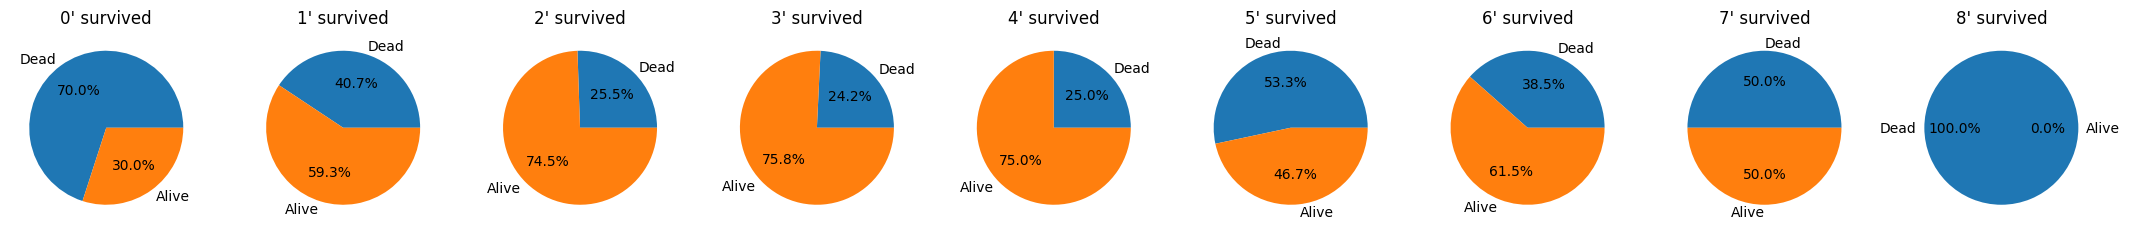

Survived,Dead,Alive
CabinCategory,,
0,481,206
1,24,35
2,12,35
3,8,25
4,8,24
5,8,7
6,5,8
7,2,2
8,1,0


In [10]:
train.Cabin.fillna('N', inplace=True)
train["CabinCategory"] = train["Cabin"].str.slice(start=0, stop=1)  
train["CabinCategory"] = train['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

c = show_pie_chart(train, 'CabinCategory')
c

In [11]:
import opendatasets as od

od.download("https://www.kaggle.com/c/titanic/data?select=train.csv",force=True)

100%|██████████| 34.1k/34.1k [00:00<00:00, 5.80MB/s]


Extracting archive .\titanic/titanic.zip to .\titanic


In [12]:
import pandas as pd

train = pd.read_csv(r'./titanic/train.csv') # raw string 기능을 사용한다는 뜻.
test = pd.read_csv(r'./titanic/test.csv')

def feature_engineering(df):
    # Sex
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

    # Embarked
    df.Embarked.fillna('S', inplace=True)
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    # Title
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.')
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs':3, 'Other':4})

    # Age
    meanAge = df[['Title', 'Age']].groupby(['Title']).mean()
    for index, row in meanAge.iterrows():
        nullIndex = df[(df.Title == index) & (df.Age.isnull())].index
        df.loc[nullIndex, 'Age'] = row[0]

    df['AgeCategory'] = pd.qcut(df.Age, 8, labels=range(1, 9))
    df.AgeCategory = df.AgeCategory.astype(int)

    # Cabin
    df.Cabin.fillna('N', inplace=True)
    df["CabinCategory"] = df["Cabin"].str.slice(start=0, stop=1)
    df["CabinCategory"] = df['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

    # Fare
    df.Fare.fillna(0, inplace=True)
    df['FareCategory'] = pd.qcut(df.Fare, 8, labels=range(1, 9))
    df.FareCategory = df.FareCategory.astype(int)

    # SibSp, Parch
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    df.loc[df["Family"] > 4, "Family"] = 5

    df['IsAlone'] = 1
    df.loc[df['Family'] > 1, 'IsAlone'] = 0

    # Ticket
    df['TicketCategory'] = df.Ticket.str.split()
    df['TicketCategory'] = [i[-1][0] for i in df['TicketCategory']]
    df['TicketCategory'] = df['TicketCategory'].replace(['8', '9', 'L'], '8')
    df['TicketCategory'] = pd.factorize(df['TicketCategory'])[0] + 1

    df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name', 'Age', 'SibSp', 'Parch'], axis=1, inplace=True)

    return df

train = feature_engineering(train)
test = feature_engineering(test)

train.info()
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        891 non-null    int64
 1   Pclass          891 non-null    int64
 2   Sex             891 non-null    int64
 3   Embarked        891 non-null    int64
 4   Title           891 non-null    int64
 5   AgeCategory     891 non-null    int32
 6   CabinCategory   891 non-null    int64
 7   FareCategory    891 non-null    int32
 8   Family          891 non-null    int64
 9   IsAlone         891 non-null    int64
 10  TicketCategory  891 non-null    int64
dtypes: int32(2), int64(9)
memory usage: 69.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          418 non-null    int64
 1   Sex             418 non-null    int64
 2   Embar

In [13]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#  Pclass, Sex, Embarked, Title, AgeCategory, CabinCategory, FareCategory, Family, IsAlone, TicketCategory 
data = train.drop('Survived', axis=1).values
# Survived
target = train['Survived'].values

In [14]:
# test_size: 분리 비율 설정. 
# stratify: 분리 기준이 될 데이터 
# random_state: 랜덤 seed
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=0)


In [15]:
rf = RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, oob_score=True, random_state=10)
rf.fit(x_train, y_train)
prediction = rf.predict(x_valid)

length = y_valid.shape[0]
accuracy = accuracy_score(prediction, y_valid)
print(f'총 {length}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')


총 357명 중 82.913% 정확도로 생존을 맞춤


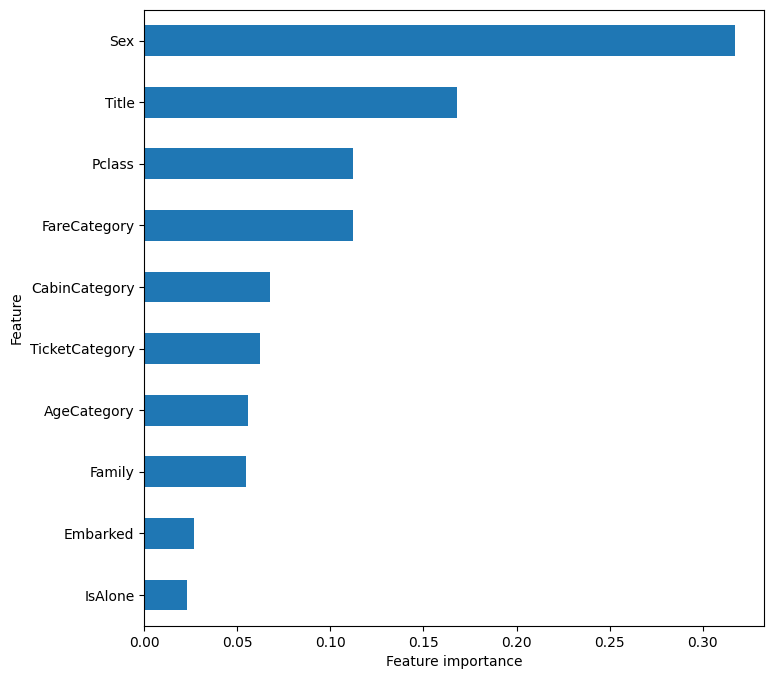

In [16]:
import matplotlib.pyplot as plt
from pandas import Series

feature_importance = rf.feature_importances_
fi = Series(feature_importance, index=train.drop(['Survived'], axis=1).columns)

plt.figure(figsize=(8, 8))
fi.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [19]:
# 지도학습 모델 import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data 분리 
data = train.drop('Survived', axis=1).values
target = train['Survived'].values
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=0)

# 모델 적용 함수 
def ml_fit(model):
    model.fit(x_train, y_train)
    prediction = model.predict(x_valid)
    accuracy = accuracy_score(prediction, y_valid)
    print(model)
    print(f'총 {y_valid.shape[0]}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')
    return model

# 기본 설정으로만 테스트 
model = ml_fit(RandomForestClassifier(n_estimators=100))
model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

RandomForestClassifier()
총 357명 중 81.793% 정확도로 생존을 맞춤
LogisticRegression()
총 357명 중 79.832% 정확도로 생존을 맞춤
SVC()
총 357명 중 81.513% 정확도로 생존을 맞춤
KNeighborsClassifier()
총 357명 중 76.190% 정확도로 생존을 맞춤
GaussianNB()
총 357명 중 73.389% 정확도로 생존을 맞춤
DecisionTreeClassifier()
총 357명 중 78.431% 정확도로 생존을 맞춤


In [20]:
model = ml_fit(RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, oob_score=True, random_state=10))

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50,
                       oob_score=True, random_state=10)
총 357명 중 82.913% 정확도로 생존을 맞춤
